In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

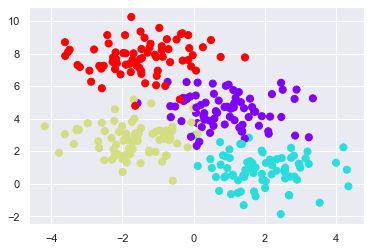

In [25]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 300, centers =4,
                 random_state = 0, cluster_std = 1.0)
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap = 'rainbow');

In [26]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

In [27]:
# function to visualize the classification
def visualize_classifier(model, X, y, ax = None, cmap = 'rainbow'):
    ax = ax or plt.gca()
    #plot the training data
    ax.scatter(X[:,0], X[:,1], c = y, s = 30, cmap = cmap,
              clim = (y.min(), y.max()), zorder = 3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X,y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num = 200),
                        np.linspace(*ylim, num = 200))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha = 0.3,
                           levels = np.arange(n_classes +1) - 0.5,
                           cmap = cmap, #clim=(y.min(), y.max()),
                           zorder = 1)
    ax.set(xlim = xlim, ylim = ylim)

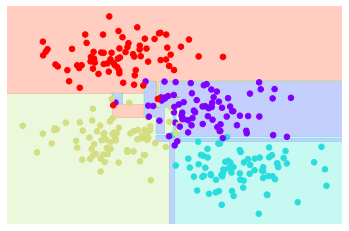

In [28]:
visualize_classifier(DecisionTreeClassifier(), X, y );

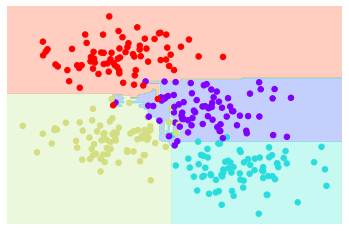

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators = 100,
                       max_samples = 0.8, random_state = 1)
bag.fit(X,y)
visualize_classifier(bag, X,y)

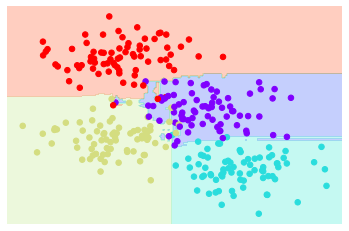

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
visualize_classifier(model, X, y)

# Random Forest Regression

<ErrorbarContainer object of 3 artists>

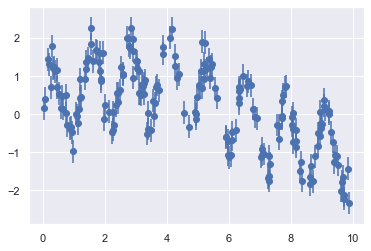

In [31]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma = 0.3):
    fast_oscillation = np.sin(5 *x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma * rng.randn(len(x))
    return slow_oscillation + fast_oscillation+noise
y = model(x)
plt.errorbar(x, y , 0.3, fmt = 'o')

<ErrorbarContainer object of 3 artists>

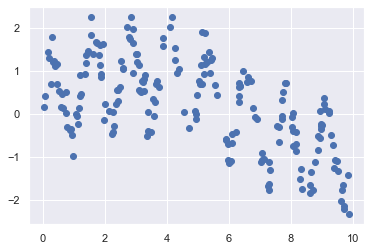

In [32]:
plt.errorbar(x, y, fmt = 'o')


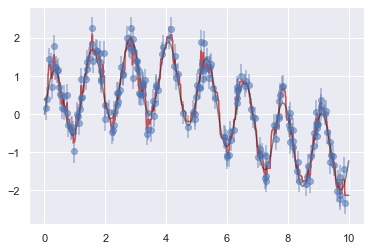

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:,None], y)
xfit = np.linspace(0,10, 1000)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit, sigma = 0)
plt.errorbar(x, y, 0.3, fmt = 'o', alpha = 0.5)
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha = 0.5)

# Examples

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

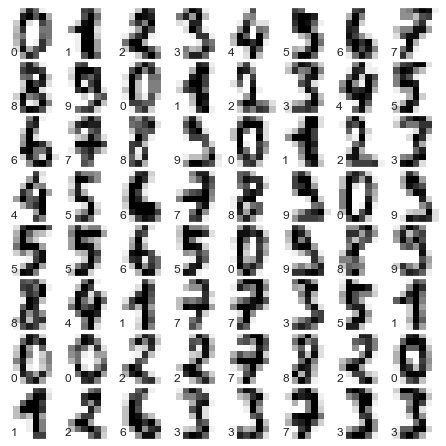

In [35]:
# set up the figure
fig = plt.figure(figsize = (6,6))
fig.subplots_adjust(left = 0, right =1, bottom = 0, top =1,
                   hspace = 0.05, wspace = 0.05)
# draw the number 
for i in range(64):
    ax = fig.add_subplot(8,8, i+1, xticks = [], yticks = [])
    ax.imshow(digits.images[i], cmap = plt.cm.binary, interpolation = 'nearest')
    ax.text(0,7,str(digits.target[i]))

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, 
                                               random_state = 0)
model = RandomForestClassifier(n_estimators = 100)
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)


In [46]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred)) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.96      1.00      0.98        43
           2       1.00      0.95      0.98        44
           3       0.94      0.98      0.96        45
           4       1.00      0.97      0.99        38
           5       1.00      0.98      0.99        48
           6       1.00      0.98      0.99        52
           7       0.98      0.98      0.98        48
           8       0.98      0.96      0.97        48
           9       0.96      0.98      0.97        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 1  0 42  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 47  0  1]
 [ 0  1  0  1  0  0  0  0 46  0]
 [ 0  0  0  1  0  0  0  0  0 46]]


Text(89.18, 0.5, 'predicted label')

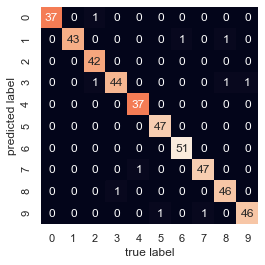

In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, ypred) 
# ndarray of shape (n_classes, n_classes)
#     ndarray of shape (n_classes, n_classes)
#     Confusion matrix whose i-th row and j-th
#     column entry indicates the number of
#     samples with true label being i-th class
#     and prediced label being j-th class.
print(mat)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd',
           cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')


In [47]:
?confusion_matrix

In [48]:
?classification_report